<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/04_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4.10 Unit hydrograph

Let us assume we have excess rainfall of 1 cm in a basin/watershed having an area of 100 $km^2$ and at the outlet, we receive the following amount of water (in length unit, however in reality it would be in volume per time unit):

0-1 hour: 0.15

1-2 hour: 0.35

2-3 hour: 0.25

3-4 hour: 0.15

4-5 hour: 0.10

Let us visualise this.

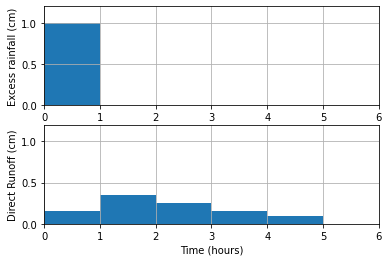

In [34]:
import numpy as np
import matplotlib.pyplot as plt

excess_rain = 1 # cm
direct_runoff = np.array([0.15, 0.35, 0.25, 0.15, 0.1])
time = np.arange(0,5)

plt.subplot(2,1,1)
plt.bar(0,excess_rain, align="edge", width=1.0)
plt.ylabel("Excess rainfall (cm)")
plt.xlim(0,6)
plt.ylim(0,1.2)
plt.grid(True)

plt.subplot(2,1,2)
plt.bar(time,direct_runoff, align="edge", width=1.0)
plt.xlabel("Time (hours)")
plt.ylabel("Direct Runoff (cm)")
plt.ylim(0,1.2)
plt.xlim(0,6)
plt.grid(True)

plt.show()

Note how we are define *edge* and *width* parameters in *bar* plot to mark the start and end of each hour correctly.

We can see from the top plot that rainfall of 1 cm is taking some time to reach the outlet and the peak is during 1-2 hours. 
You can also check the total direct runoff at outlet -- it should be equal to the total excess rainafll. 

We can use convolution to compute the discharge for any rainfall event.

Let us assume we have rainfall for 6 hours, with varying intensity.

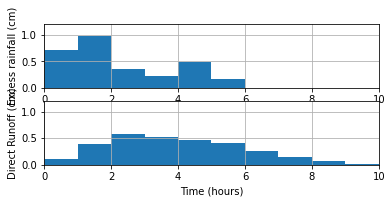

In [35]:
import numpy as np
import matplotlib.pyplot as plt

excess_rain = np.random.uniform(size=6)
time_rain = np.arange(len(excess_rain))
unit_direct_runoff = np.array([0.15, 0.35, 0.25, 0.15, 0.1])

direct_runoff = np.convolve(excess_rain, unit_direct_runoff)
time_dr = np.arange(len(direct_runoff))

plt.subplot(3,1,1)
plt.bar(time_rain, excess_rain, align="edge", width=1.0)
plt.ylabel("Excess rainfall (cm)")
plt.xlim(0,10)
plt.ylim(0,1.2)
plt.grid(True)

plt.subplot(3,1,2)
plt.bar(time_dr, direct_runoff, align="edge", width=1.0)
plt.xlabel("Time (hours)")
plt.ylabel("Direct Runoff (cm)")
plt.ylim(0,1.2)
plt.xlim(0,10)
plt.grid(True)

plt.show()

To check the mass balance error, we can check the total excess rainfall and total direct runoff:

In [36]:
print(excess_rain.sum())
print(direct_runoff.sum())

2.9410571593991275
2.9410571593991275


Both are exactly same, so it means there is no computational error issue.

We can convert direct runoff from the unit of length (cm) to volumetric per time unit ($m^3/s$). For that, we need to multiply by the area of watershed and divide by the duration of each rainfall event (one hour in this case).

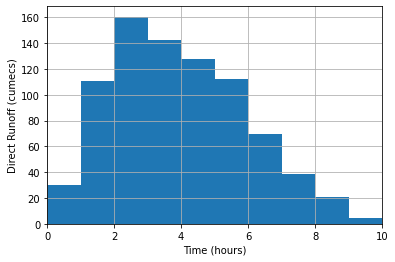

In [37]:
area_watershed = 100 # km2
area_watershed *= 1E6 # convert from km2 to m2

direct_runoff_cumecs = (direct_runoff/100)*area_watershed/3600

plt.bar(time_dr, direct_runoff_cumecs, align="edge", width=1.0)
plt.xlabel("Time (hours)")
plt.ylabel("Direct Runoff (cumecs)")
#plt.ylim(0,1.2)
plt.xlim(0,10)
plt.grid(True)